# Jupiter Notebook to build a quick and imperfect prediction solution

This notebook is an attempt to train a model to predict the salary in Data Science based on the kaggle dataset from https://www.kaggle.com/datasets/lainguyn123/data-science-salary-landscape.

In [147]:
# Package for linear regressions


import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,root_mean_squared_log_error
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

## Loading and Cleaning datasets

In this section, we will load the dataset and extract the features and performs the cleaning.

In [148]:
pd.options.display.float_format = '{:.2f}'.format

salaries_dataset_url = './ds_salaries.csv'
full_dataset = pd.read_csv(salaries_dataset_url)
full_dataset.describe(include='all').T



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.00,NaN,NaN,NaN,303.00,175.37,0.00,151.50,303.00,454.50,606.00
work_year,607.00,NaN,NaN,NaN,2021.41,0.69,2020.00,2021.00,2022.00,2022.00,2022.00
experience_level,607,4,SE,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,607,4,FT,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,607,50,Data Scientist,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,607.00,NaN,NaN,NaN,324000.06,1544357.49,4000.00,70000.00,115000.00,165000.00,30400000.00
salary_currency,607,17,USD,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,607.00,NaN,NaN,NaN,112297.87,70957.26,2859.00,62726.00,101570.00,150000.00,600000.00
employee_residence,607,57,US,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,607.00,NaN,NaN,NaN,70.92,40.71,0.00,50.00,100.00,100.00,100.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Columns: 192 entries, remote_ratio to remote_ratio_str_50
dtypes: int64(192)
memory usage: 910.6 KB
<class 'pandas.core.series.Series'>
RangeIndex: 607 entries, 0 to 606
Series name: salary_in_usd
Non-Null Count  Dtype  
--------------  -----  
607 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB
Features num= 192 Index(['remote_ratio', 'work_year_2020', 'work_year_2021', 'work_year_2022',
       'experience_level_EN', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE', 'employment_type_CT', 'employment_type_FL',
       ...
       'company_location_TR', 'company_location_UA', 'company_location_US',
       'company_location_VN', 'company_size_L', 'company_size_M',
       'company_size_S', 'remote_ratio_str_0', 'remote_ratio_str_100',
       'remote_ratio_str_50'],
      dtype='object', length=192)


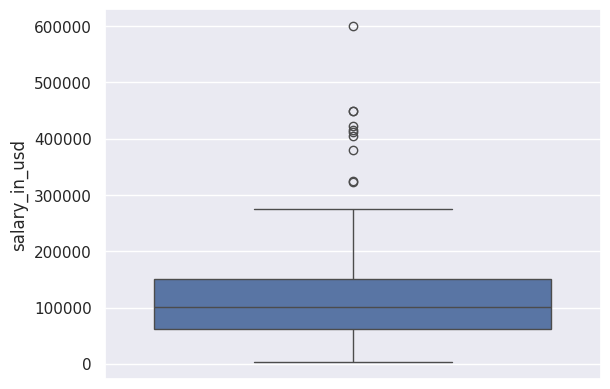

In [155]:

target_column = 'salary_in_usd'

#def my_preparation(X, Y):
# Reorder the salary column and remove the salary and currency columns and ID
ignored_cols =  ['Unnamed: 0', 'salary']
X = full_dataset.drop(ignored_cols, axis=1)
#X.drop(X[X.company_location != "US"].index, inplace = True)
# We convert the work year as a categorical feature
X['work_year'] = X['work_year'].map(str)
X['remote_ratio_str'] = X['remote_ratio'].map(str)

data_with_dummies = pd.get_dummies(X, drop_first=False)
data_preprocessed = data_with_dummies.replace({True:1, False:0})

#q_low = data_preprocessed["salary_in_usd"].quantile(0.01)
#q_hi  = data_preprocessed["salary_in_usd"].quantile(0.99)

#data_preprocessed = data_preprocessed[(data_preprocessed["salary_in_usd"] < q_hi) & (data_preprocessed["salary_in_usd"] > q_low)]

sns.boxplot(data_preprocessed[target_column])



X = data_preprocessed
Y =  np.log(X[target_column])
X = X.drop(['salary_in_usd'], axis=1)


# We apply log on the salary feature
X.info()
Y.info()
feature_cols = X.columns

print("Features num=", len(feature_cols), feature_cols)
# Export CSV
X.to_csv('train.csv', index=False)  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


### Split the dataset in train and test



In [150]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("Y_train", y_train.shape)
print("Y_test", y_test.shape)

X_train (546, 192)
X_test (61, 192)
Y_train (546,)
Y_test (61,)


## Model training

We will use a hierarchical model to train.

In [156]:
import keras
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ARDRegression, BayesianRidge, HuberRegressor, Lars, LarsCV, LassoCV, LogisticRegression, MultiTaskElasticNet, QuantileRegressor, RANSACRegressor, SGDRegressor, TheilSenRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


def fit_model(inputs, targets):
    return LinearRegression()    

def create_model(X,y, X_test, y_test):
    # Set random seed
    tf.random.set_seed(42)
    nbFeatures = X.columns.size
        # Create a model using the Sequential API
    model=Sequential() #here we get an insance of our model
    model.add(Dense(nbFeatures, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
    model.add(Dense(nbFeatures, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
    model.add(Dense(nbFeatures, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
    model.add(Dense(nbFeatures, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
    model.add(Dense(nbFeatures, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
    model.add(Dense(nbFeatures, activation="relu")) # here we add a dense layer with 19 neurons because we have 19 features
    model.add(Dense(1)) # here we add add the final layer with 1 neurons because we have one output, that is the house price
    # Compile the model
    model.compile(loss=tf.keras.losses.mse, # mae is short for mean absolute error
                optimizer=tf.keras.optimizers.Adam(), # SGD is short for stochastic gradient descent
                metrics=["mae", "mse"])

    # Fit the model
    # model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
    model.fit(x= X, y= y, batch_size=4, epochs=300, validation_data=(X_test, y_test))
    return model

regr = fit_model( X_train, y_train )
#regr = create_model(X_train, y_train,X_test,y_test)
regr.fit(X_train, y_train)

## Predict the value for the test dataset
y_pred = regr.predict(X_test)

#print("Predictions: ", y_pred)
#print("Predictions2: ", y_test)
print(y_pred[0:5])
print(y_test[0:5])

## Compute Accuracy

print("mean_squared_log_error (MSLE): %.2f" % mean_squared_log_error(y_test, y_pred))  
print("root_mean_squared_log_error: %.2f" % root_mean_squared_log_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination, R2: %.2f" % r2_score(y_test, y_pred))


[11.89927058 11.89927058 11.60281226 12.20438818 10.09738216]
563   11.85
289   11.81
76    11.51
78    12.51
182   10.17
Name: salary_in_usd, dtype: float64
mean_squared_log_error (MSLE): 0.00
root_mean_squared_log_error: 0.04
Coefficient of determination, R2: 0.76


In [152]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### Graph and precision evaluation

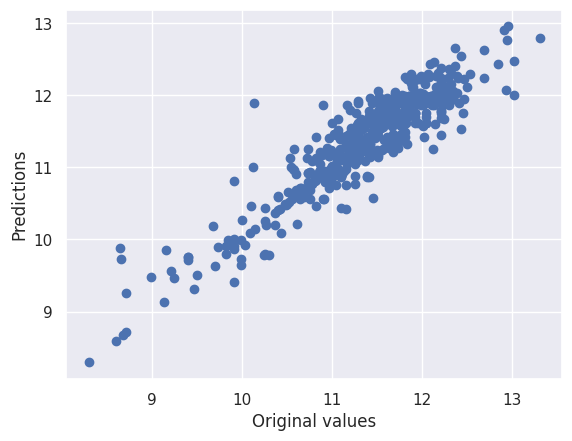

In [153]:
reg=LinearRegression()
reg.fit(X_train, y_train)
yhat = reg.predict(X_train)
plt.scatter(y_train, yhat)
plt.xlabel('Original values')
plt.ylabel('Predictions')
plt.show()


In [154]:
predictions = reg.predict(X_test)
predictions2 = regr.predict(X_test)


print("root_mean_squared_log_error: %.2f" % root_mean_squared_log_error(y_test, predictions))
print("root_mean_squared_log_error : complex: %.2f" % root_mean_squared_log_error(y_test, predictions2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination, R2: %.2f" % r2_score(y_test, predictions))
print("Coefficient of determination complex, R2: %.2f" % r2_score(y_test, predictions2))



results = pd.DataFrame({'Prediction': np.exp(predictions), 'Actual': np.exp(y_test)})
results["Prediction my model"] = np.exp(predictions2)
results['Difference'] = np.exp(y_test) - np.exp(predictions)
results['Difference %'] = abs(results['Difference'])/results['Actual']
results['Difference2'] = np.exp(y_test) - np.exp(predictions2)
results['Difference2 %'] = abs(results['Difference2'])/results['Actual']

results.sort_values(by='Difference %')

root_mean_squared_log_error: 0.04
root_mean_squared_log_error : complex: 0.07
Coefficient of determination, R2: 0.76
Coefficient of determination complex, R2: 0.41


,Prediction,Actual,Prediction my model,Difference,Difference %,Difference2,Difference2 %
332,110656.63,112900.00,110656.63,2243.37,0.02,2243.37,0.02
443,76580.87,78526.00,76580.87,1945.13,0.02,1945.13,0.02
70,60350.42,62726.00,18607.26,2375.58,0.04,44118.74,0.70
211,54541.33,56738.00,54541.33,2196.67,0.04,2196.67,0.04
602,147159.24,154000.00,147159.24,6840.76,0.04,6840.76,0.04
...,...,...,...,...,...,...,...
208,32909.75,20000.00,8716.01,-12909.75,0.65,11283.99,0.56
420,212399.60,112300.00,212399.60,-100099.60,0.89,-100099.60,0.89
210,61797.97,24823.00,61797.97,-36974.97,1.49,-36974.97,1.49
521,32326.75,10000.00,9967.00,-22326.75,2.23,33.00,0.00
